# Análise de Carteira de Investimentos: Risco x Retorno (2020–2025)

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# lista de 5 ativos brasileiros que serão analisados
ativos = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BOVA11.SA', 'ABEV3.SA']

# baixa dados históricos de 2020 a 2025
dados = yf.download(ativos, start="2020-01-01", end="2025-01-01", group_by='ticker')

# adj Close = preço de fechamento ajustado para dividendos e splits
adj_close = pd.DataFrame()
for ativo in ativos:
    adj_close[ativo] = dados[ativo]['Close']

# breve resultado
print("Preços Ajustados:")
print(adj_close.head())


### Cálculo dos retornos diários e anuais

In [ ]:
# Calcula a variação percentual diária de cada ativo
retornos_diarios = adj_close.pct_change().dropna()
print("\nRetornos Diários: ")
print(retornos_diarios.head())

# Retornos Anuais Médios
# Considerando ~252 dias úteis por ano
retornos_anuais = (1 + retornos_diarios.mean())**252 - 1
print("\nRetornos Anuais Médios:")
print(retornos_anuais)

# Retornos Anuais por Ano
adj_close['Ano'] = adj_close.index.year

# Calcula o retorno de cada ativo em cada ano
retornos_anuais_por_ano = adj_close.groupby('Ano').apply(
    lambda x: x.drop(columns='Ano').iloc[-1] / x.drop(columns='Ano').iloc[0] - 1
)

# Mostrar retornos anuais de cada ativo por ano
print("\nRetornos Anuais por Ano:")
print(retornos_anuais_por_ano)



Retornos Diários: 
            PETR4.SA  VALE3.SA  ITUB4.SA  BOVA11.SA  ABEV3.SA  Ano
Date                                                              
2020-01-03 -0.008143 -0.007363 -0.010518  -0.003851 -0.014063  0.0
2020-01-06  0.011823 -0.005933 -0.014882  -0.010633  0.004755  0.0
2020-01-07 -0.003895  0.007275 -0.023199  -0.003109  0.002103  0.0
2020-01-08 -0.006191  0.000185 -0.016294  -0.002584 -0.004722  0.0
2020-01-09 -0.003279 -0.013146 -0.019932  -0.002590 -0.007907  0.0

Retornos Anuais Médios:
PETR4.SA     0.443364
VALE3.SA     0.179252
ITUB4.SA     0.053796
BOVA11.SA    0.040394
ABEV3.SA    -0.008996
Ano          0.000401
dtype: float64

Retornos Anuais por Ano:
      PETR4.SA  VALE3.SA  ITUB4.SA  BOVA11.SA  ABEV3.SA
Ano                                                    
2020 -0.076854  0.676894 -0.147201   0.011467 -0.163344
2021  0.210751  0.002747 -0.298177  -0.116487  0.039932
2022  0.349021  0.248862  0.208454   0.060242 -0.002932
2023  1.103789 -0.062826  0.45168

C:\Users\domingos.alves\AppData\Local\Temp\ipykernel_18620\1904836589.py:16: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  retornos_anuais_por_ano = adj_close.groupby('Ano', group_keys=False).apply(


### Visualização

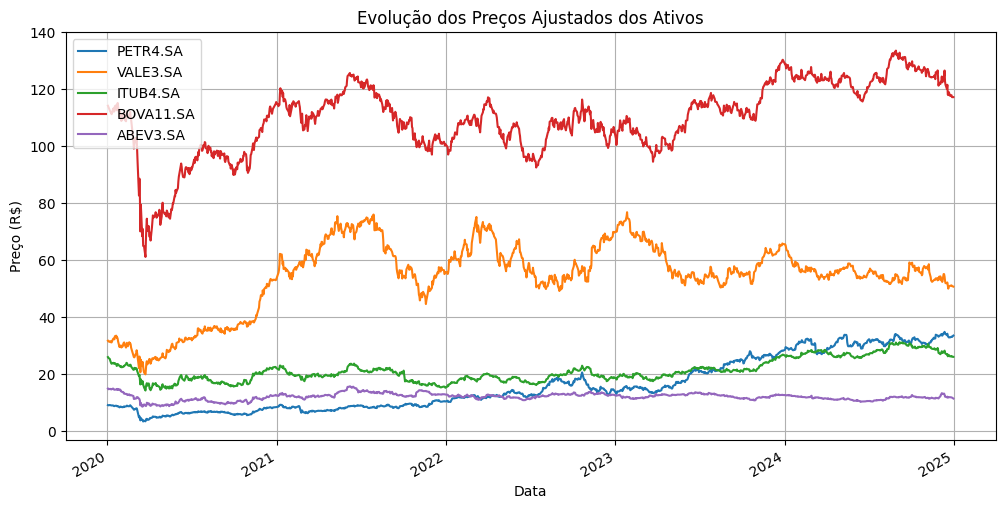

In [ ]:
adj_close.iloc[:, :-1].plot(figsize=(12,6), title="Evolução dos Preços Ajustados dos Ativos")
plt.xlabel("Data")
plt.ylabel("Preço (R$)")
plt.grid(True)
plt.show()

# A seguir é possível visualizar a evoluação histórica dos ativos ao longo dos 5 anos
# Pode-se observar que os ativos da BOVA11 e da VALE3 foram os que sofreram maior variação em relação aos outros


### Retornos Anuais por Ano

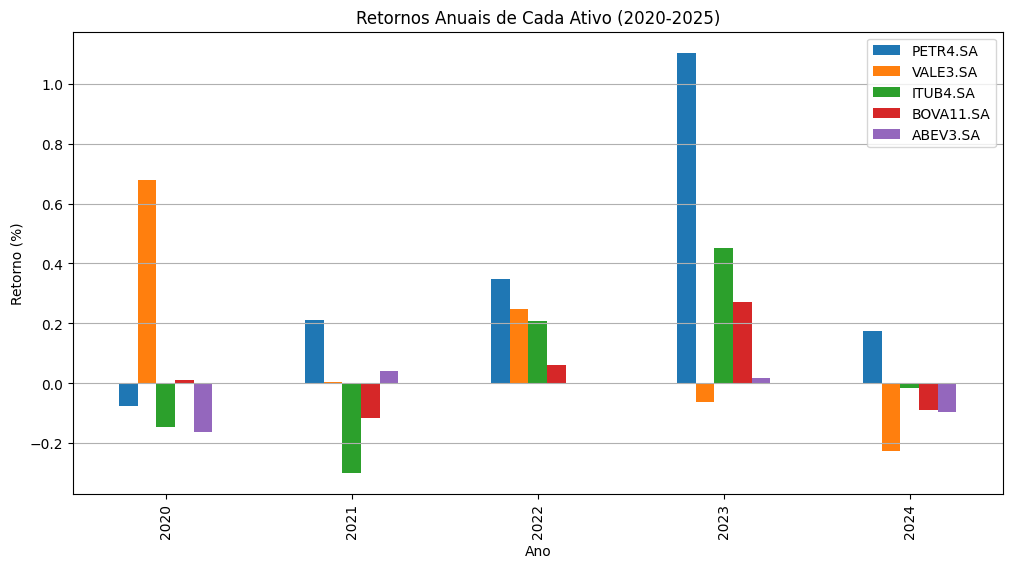

In [ ]:
retornos_anuais_por_ano.plot(kind='bar', figsize=(12,6))
plt.title("Retornos Anuais de Cada Ativo (2020-2025)")
plt.ylabel("Retorno (%)")
plt.xlabel("Ano")
plt.grid(axis='y')
plt.show()

# A seguir, visualizamos os retornos anuais de cada ativo de 2020 a 2024.
# Cada barra representa o retorno total do ano para o ativo correspondente.
# Permite identificar anos de alta ou baixa performance, por exemplo, uma maior variação entre ativos em 2023.

### Volatilidade e Risco da Carteira

In [ ]:
# Qual é a volatilidade (risco) de cada ativo individualmente?
    # Permite medir quanto os preços variam em torno da média, ou seja, o risco de cada ativo.

# Como os ativos se relacionam entre si?
    # A correlação mostra se os ativos tendem a subir e cair juntos, ajudando a montar uma carteira diversificada.

# Qual seria o risco de uma carteira formada por esses ativos?
    #Considera volatilidade individual e correlação para calcular risco combinado.

#### Volatilidade Diária e Anualizada

In [ ]:
vol_diaria = retornos_diarios.std()
print("Volatilidade Diária (%):")
print(vol_diaria * 100)

# Volatilidade anualizada (~252 dias úteis por ano)
vol_anual = vol_diaria * (252 ** 0.5)
print("\nVolatilidade Anualizada (%):")
print(vol_anual * 100)

#### Correlação entre ativos

In [23]:
# Valores próximos de 1 → ativos se movem juntos.
# Valores próximos de 0 → movimentos independentes.
# Valores negativos → movimentos opostos.

# Matriz de correlação diária
correlacao = retornos_diarios.corr()
print("\nCorrelação entre Ativos:")
print(correlacao)


Correlação entre Ativos:
           PETR4.SA  VALE3.SA  ITUB4.SA  BOVA11.SA  ABEV3.SA       Ano
PETR4.SA   1.000000  0.470765  0.506056   0.728505  0.378692 -0.006670
VALE3.SA   0.470765  1.000000  0.366489   0.631489  0.232674  0.028644
ITUB4.SA   0.506056  0.366489  1.000000   0.749344  0.510285 -0.019908
BOVA11.SA  0.728505  0.631489  0.749344   1.000000  0.593847 -0.056963
ABEV3.SA   0.378692  0.232674  0.510285   0.593847  1.000000 -0.030685
Ano       -0.006670  0.028644 -0.019908  -0.056963 -0.030685  1.000000
